# Принятие решений в бизнесе на основе данных
### Описание данных:

- Данные для первой части:

  - Файл /datasets/hypothesis.csv
    - Hypothesis — краткое описание гипотезы;
    - Reach — охват пользователей по 10-балльной шкале;
    - Impact — влияние на пользователей по 10-балльной шкале;
    - Confidence — уверенность в гипотезе по 10-балльной шкале;
    - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение  - Efforts, тем дороже проверка гипотезы.

- Данные для второй части:

  - Файл /datasets/orders.csv
    - transactionId — идентификатор заказа;
    - visitorId — идентификатор пользователя, совершившего заказ;
    - date — дата, когда был совершён заказ;
    - revenue — выручка заказа;
    - group — группа A/B-теста, в которую попал заказ.
  
  - Файл /datasets/visitors.csv
    - date — дата;
    - group — группа A/B-теста;
    - visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Описание проекта:
#### Часть 1. Приоритизация гипотез.
- В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
- Задача:
  - Применить фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
  - Применить фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
  - Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE

#### Часть 2. Анализ A/B-теста . 
- Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv
- Задача:
  - Построить график кумулятивной выручки по группам. Сделайте выводы и предположения.
  - Построить график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
  - Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
  - Построить график кумулятивной конверсии по группам. Сделайте выводы и предположения.
  - Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
  - Построить точечный график количества заказов по пользователям. Сделайте выводы и предположения.
  - Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
  - Посчитать точечный график стоимостей заказов. Сделайте выводы и предположения.
  - Посчитать 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
  - Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
  - Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
  - Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
  - Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

## Загрузить данные и подготовить их к анализу

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
import matplotlib.pyplot as plt

hypothesis = pd.read_csv('/datasets/hypothesis.csv')

orders = pd.read_csv('/datasets/orders.csv')

visitors = pd.read_csv('/datasets/visitors.csv')

In [2]:
def df_info(data):
    data
    print('Общая информация')
    print('-'*52)
    print(data.info())
    print('-'*52)
    print('Статистика датафрейма')
    print('-'*52)
    print(data.describe())
    print('-'*52)
    print('Наличие дубликатов')
    print(data.duplicated().sum())
    print('-'*52)
    print('Наличие пропусков')
    print('-'*52)
    print(data.isna().sum())

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
df_info(hypothesis)

Общая информация
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
----------------------------------------------------
Статистика датафрейма
----------------------------------------------------
           Reach     Impact  Confidence    Efforts
count   9.000000   9.000000    9.000000   9.000000
mean    4.777778   4.777778    5.555556   4.888889
std     3.153481   3.192874    3.045944   2.803767
min     1.000000   1.000000    1.000000   1.000000
25%     3.000000   3.000000    3.000000   3.000000
50%     3.000000   3.000000    7.000000   5.000000
75%     8.000000   7.000000    8.000000   6.000000
max    10.000000  10.000000    9.000000  10.000000
---------------------------

In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
df_info(orders)

Общая информация
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
----------------------------------------------------
Статистика датафрейма
----------------------------------------------------
       transactionId     visitorId       revenue
count   1.197000e+03  1.197000e+03  1.197000e+03
mean    2.155621e+09  2.165960e+09  8.348006e+03
std     1.229085e+09  1.236014e+09  3.919113e+04
min     1.062393e+06  5.114589e+06  5.000000e+01
25%     1.166776e+09  1.111826e+09  1.220000e+03
50%     2.145194e+09  2.217985e+09  2.978000e+03
75%     3.237740e+09  3.177606e+09  8.290000e+03
max     4.293856e+09  4.283872e+09  1.294500e+06
------------

In [7]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
df_info(visitors)

Общая информация
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
----------------------------------------------------
Статистика датафрейма
----------------------------------------------------
         visitors
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000
----------------------------------------------------
Наличие дубликатов
0
----------------------------------------------------
Наличие пропусков
----------------------------------------------------
date        0
group       0
visitors    0
dtype: int64


In [9]:
orders['date'] = pd.to_datetime(orders['date'],format="%Y/%m/%d")
visitors['date'] = pd.to_datetime(visitors['date'],format="%Y/%m/%d")

### Комментарий
- Во всех таблицах нет пропусков и дубликатов, но в таблицах orders и visitors форматы даты некорректны, исправим это методом pd.to_datetime()

## Часть 1. Приоритизация гипотез.

In [10]:
pd.set_option('display.max_colwidth', -1)
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis.sort_values(by='ICE',ascending=False)


,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


In [11]:
hypothesis.sort_values(by='RICE',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


### Комментарий
- При применении фреймворка ICE для приоритизации гипотез на первое место попала гипотеза 8
- При применении фреймворка RICE для приоритизации гипотез на первое место попала гипотеза 7
- Изменение приоритизации гипотез произошло из за того что в фреймворке RICE добавилась дополнительная переменная "Reach — скольких пользователей затронет изменение, которое вы хотите внести"

## Часть 2. Анализ A/B-теста

In [12]:
datesGroups = orders[['date','group']].drop_duplicates()

In [13]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [14]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [15]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [16]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


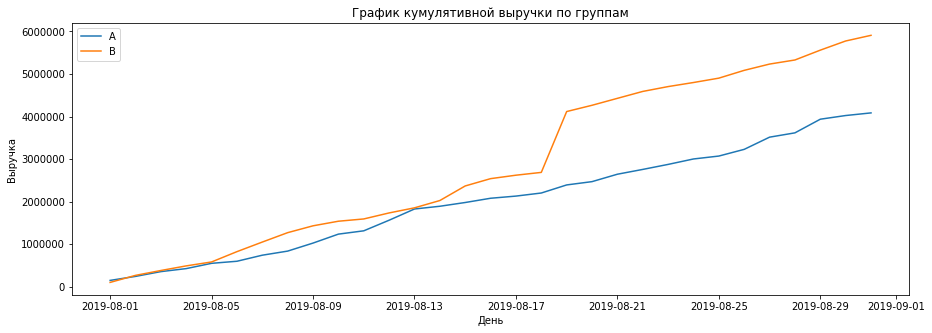

In [17]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('День')
plt.legend() 
plt.show()

### Комментарий
- На графике мы видим, что Выручка почти равномерно увеличивается в течение всего теста. Но начиная с 2019-08-18 выручка в группе В резко выросла и на протяжении оставшегося времени теста сильно опрережает группу А это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке 

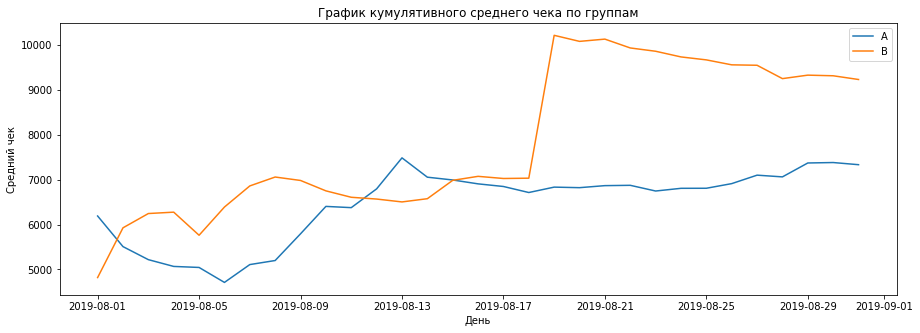

In [18]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('День')
plt.legend() 
plt.show()

### Комментарий
- Средний чек в группе В сильно вырос начиная с того же преиода что и на прошлом графике и до конца теста сильно больше чем в группе А, что может говорить о том что в группу В попали самые дорогие заказы, либо их число резко возросло. В начале теста в группе В средний чек также был выше.

In [19]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

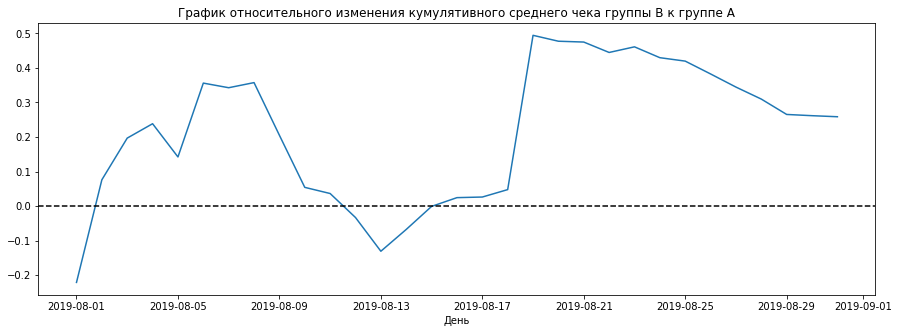

In [20]:
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('День')
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

### Комментарий
- В нескольких точках график сильно скачет, это может говорить о большом количестве крупных заказов и выбросов

In [21]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

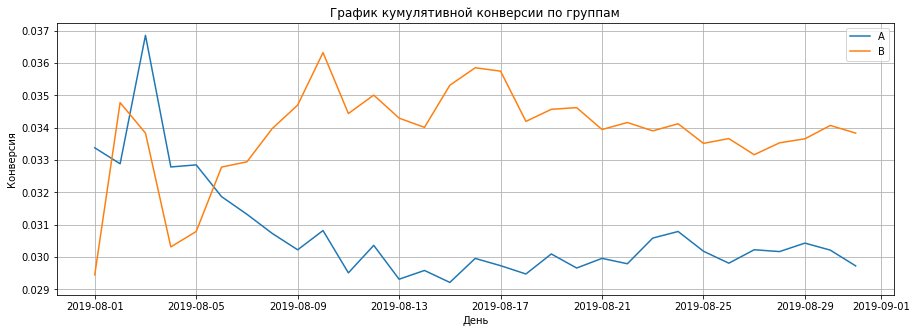

In [22]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel('Конверсия')
plt.xlabel('День')
plt.grid()
plt.legend() 
plt.show()

### Комментарий
- В начале теста у обоих групп резкий скачек конверсии, группа А опережает В, потом спад. Группа В колеблица на высоком уровне, постепенно снижаясь и фиксируется к концу теста, а группа А колеблится значительно ниже

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

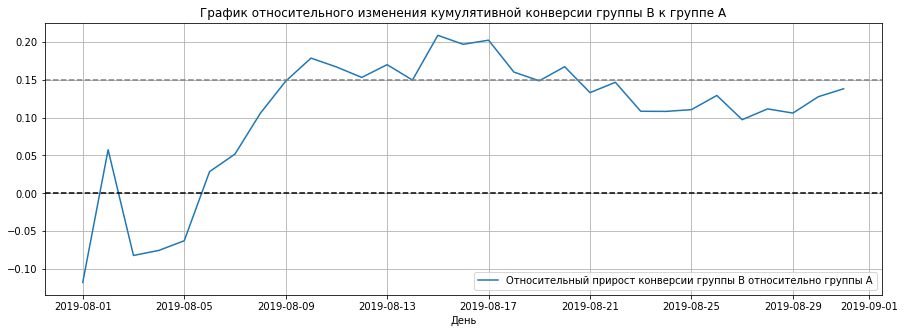

In [24]:
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('День')
plt.grid()
plt.legend() 
plt.show()

### Комментарий
- Группа В почти с самого начала лидирует по конверсии становится лучше и лучше, и приближается к приросту 15% относительно группы А

In [25]:
orders_count = orders.groupby('visitorId').agg({'transactionId':'nunique'})
orders_count

,transactionId
visitorId,
5114589,1
6958315,1
8300375,2
11685486,1
39475350,1
...,...
4266935830,2
4278982564,1
4279090005,1


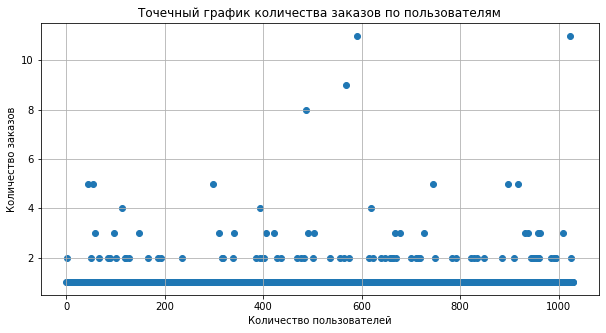

In [26]:
x_values = pd.Series(range(0,len(orders_count['transactionId'])))
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders_count['transactionId']) 
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.grid()
plt.show()

### Комментарий
- Основная часть пользователей делают 1-2 заказа, но есть выбросы, некоторые пользователи делают от 3 до 10 заказов но это единичные случаи, будем считать их аномальными пользователями

In [27]:
print(np.percentile(orders_count['transactionId'], [95, 99]))

[2. 4.]


### Комментарий
- Не более 5% пользователей делают больше 2 заказов, все что больше примем за аномальные значения

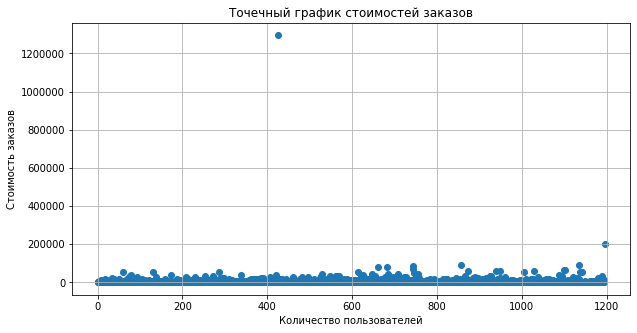

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество пользователей')
plt.grid()
plt.show()

### Комментарий
- По графику можно выбрать границу аномальных заказов между 20 000 и 40 000 рублей. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями.

In [29]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


### Комментарий
- Не более 5% заказов дороже 28000 рублей и не более 1% дороже  58233, все что более 5% примем за аномальные значения

In [30]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head() 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


<div class = "alert alert-info" >
### Описание нового объединенного датафрейма для дальнейшего анализа:
  
- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A
- revenuePerDateA — суммарная выручка в выбранную дату в группе A
- ordersPerDateB — количество заказов в выбранную дату в группе B
- revenuePerDateB — суммарная выручка в выбранную дату в группе B
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B
- visitorsPerDateA — количество пользователей в выбранную дату в группе A
- visitorsPerDateB — количество пользователей в выбранную дату в группе B
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B

Нужно проверить гипотизы:
- Есть ли статистически значимые различия в конверсии между группами по «сырым» данным
- Есть ли статистически значимые различия в среднем чеке заказа между группами по «сырым» данным    
- Есть ли статистически значимые различия в конверсии между группами по «очищенным» данным
- Есть ли статистически значимые различия в среднем чеке заказа между группами по «очищенным» данным      
- Для проверки гипотизы выбираем непараметрический тест Уилкоксона-Манна-Уитни, так как он не так требователен к данным(не обязательно иметь нормальное распределение). Этот метод работает с рангами а не с самими значениями, поэтому к ниму прибегают когда работа с самими значениями невозможна из-за выбросов(как в нашем случае), сильно сдвигающих параметрические результаты.
- пороговый уровень статистической значимости alpha выберем 0,05 или 5%, так как выборки не большие

##### Проверим первую гипотизу.
Сформулируем нулевую гипотезу,статистически значимые различия в конверсии между группами по «сырым» данным нет, тогда альтернативная гипотеза будет что статистически значимые различия в конверсии между группами по «сырым» данным есть.

In [31]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB,alternative='two-sided')[1]))

print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 

p-value: 0.017
Относительный прирост конверсии группы B: 0.138


### Комментарий
- По сырым данным различий в конверсии групп A и B есть
- Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимые различия в конверсии между группами по «сырым» данным нет, отвергаем. Относительный прирост группы B к группе А равен 13.8% 

##### Проверим вторую гипотизу.
Сформулируем нулевую гипотезу,статистически значимых различий в среднем чеке заказа между группами по «сырым» данным нет, тогда альтернативная гипотеза будет что статистически значимые различия в конверсии между группами по «сырым» данным есть.

In [32]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'],alternative='two-sided')[1]))
print('Относительное различие в среднем чеке между группами: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.729
Относительное различие в среднем чеке между группами: 0.259


### Комментарий
- p-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что статистически значимые различия в конверсии между группами по «сырым» данным есть, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A - 25.9%

In [33]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] >= 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(111,)


### Комментарий
- Примем за аномальных пользователей тех, кто совершил 2 и более заказов или совершил заказ дороже 28 000 рублей
- Так мы уберём 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами
- Всего 63 аномальных пользователей

##### Проверим третью гипотизу.
Сформулируем нулевую гипотезу,статистически значимых различий в конверсии между группами по «очищенным» данным нет, тогда альтернативная гипотеза будет что статистически значимые различия в конверсии между группами по «очищенным» данным есть.

In [34]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [35]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered,alternative='two-sided')[1]))
print('Относительный прирост конверсии группы B: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.016
Относительный прирост конверсии группы B: 0.168


### Комментарий
- Результаты по конверсии практически не изменились.p-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимые различия в конверсии между группами по «очищеным» данным нет, отвергаем 
- Относительный прирост группы B к группе А увеличился до 16.8% 

##### Проверим четвертую гипотизу.
Сформулируем нулевую гипотезу,статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет, тогда альтернативная гипотеза будет что статистически значимые различия в конверсии между группами по «очищенным» данным есть.

In [36]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],alternative='two-sided'
        )[1]
    )
)

print(
    "Относительное различие в среднем чеке между группами: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.835
Относительное различие в среднем чеке между группами: -0.006


### Комментарий
- - p-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что статистически значимые различия в конверсии между группами по «очищеным» данным есть, нет. 
- После очистки данных разница в среднем чеке сократилась до 0.6% на этот раз в пользу группы А

## Общий вывод
- В первой части проекта мы приоритизировали гипотезы двумя фреймворками ICE и RICE, в первом случае на первое место попала гипотеза 8, во-втором гипотеза 7, изменение приоритизации гипотез произошло из за того что в фреймворке RICE добавилась дополнительная переменная "Reach — скольких пользователей затронет изменение, которое вы хотите внести"
- Во-второй части проекта мы проанализировали A/B-тест. Вот результаты решённых в этом проекте задач:
  - Кумулятивная выручка почти равномерно увеличивается в течение всего теста. Но начиная с 2019-08-18 выручка в группе В резко выросла и на протяжении оставшегося времени теста сильно опрережает группу А это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.
  - Кумулятивный средний чек в группе В сильно вырос начиная с того же преиода что и на прошлом графике и до конца теста сильно больше чем в группе А, что может говорить о том что в группу В попали самые дорогие заказы, либо их число резко возросло. В начале теста в группе В средний чек также был выше.
  - На графике относительного изменения кумулятивного среднего чека группы B к группе A наблюдаем значительные колебания относительного изменения кумулятивного среднего чека в группах, это может говорить о большом количестве крупных заказов и выбросов.
  - На графике кумулятивной конверсии по группам мы видим,что в начале теста у обоих групп резкий скачек конверсии, группа А опережает В, потом спад. Группа В колеблица на высоком уровне, постепенно снижаясь и фиксируется к концу теста, а группа А колеблится значительно ниже.
  - На графике относительного изменения кумулятивной конверсии группы B к группе A мы видим, что группа В почти с самого начала лидирует по конверсии становится лучше и лучше, и приближается к приросту 15% относительно группы А
  - Основная часть пользователей делают 1-2 заказа, но есть выбросы, некоторые пользователи делают от 3 до 10 заказов но это единичные случаи, будем считать их аномальными пользователями
  - Не более 5% заказов дороже 28000 рублей,все что более 5% примем за аномальные значения
  - Мы проверили 4 гипотизы:
    - Есть ли статистически значимые различия в конверсии между группами по «сырым» данным
    - Есть ли статистически значимые различия в среднем чеке заказа между группами по «сырым» данным
    - Есть ли статистически значимые различия в конверсии между группами по «очищенным» данным
    - Есть ли статистически значимые различия в среднем чеке заказа между группами по «очищенным» данным
  - И сделали вывод, что:
    - Различия в конверсии между группами статистически значимы, конверсия в группе B больше на 16.8 % чем в группе A, как по сырым данным, так и после фильтрации аномалий
    - Различия в среднем чеке между группами не являются статистически значимыми
    - После очистки данных от дорогих заказов, искажающих картину показывает, что средний чек в группе B на 0,6 % меньше чем в группе А, а не больше на 25.9 % как было по сырым данным
    - Остановить тест, зафиксировать победу группы В так как график различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту